In [1]:
# libraries
import pyodbc # for connecting from Python to SQL
import pandas as pd # our "go-to" library for data wrangling
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date

In [3]:
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server={LAPTOP-8LH48O8C};'
                      'Database={AdventureWorksDW2017};'
                      'Trusted_Connection=yes;')

In [4]:
sql_for_df ="SELECT UnitPrice,[OrderQuantity],[OrderDateKey],dc.BirthDate,dc.Gender,dc.CommuteDistance,dc.GeographyKey,dc.HouseOwnerFlag,dc.NumberChildrenAtHome,dc.NumberCarsOwned,fs.[SalesTerritoryKey],dc.Gender,dc.MaritalStatus,DATEDIFF(month,[OrderDate],'2014-08-02 00:00:00.000') as monthdiff,fs.OrderDate,fs.CustomerKey,dc.[DateFirstPurchase] FROM [AdventureWorksDW2017].[dbo].[FactInternetSales] fs join [AdventureWorksDW2017].[dbo].[DimCustomer] dc on fs.CustomerKey= dc.CustomerKey"
SOH = pd.read_sql(sql_for_df , conn)


conn.close()

<ipython-input-4-d6843731bad8>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  SOH = pd.read_sql(sql_for_df , conn)


In [5]:

df=pd.DataFrame(SOH)


In [6]:
df.shape

(60398, 17)

In [7]:
df.isnull().sum()

UnitPrice               0
OrderQuantity           0
OrderDateKey            0
BirthDate               0
Gender                  0
CommuteDistance         0
GeographyKey            0
HouseOwnerFlag          0
NumberChildrenAtHome    0
NumberCarsOwned         0
SalesTerritoryKey       0
Gender                  0
MaritalStatus           0
monthdiff               0
OrderDate               0
CustomerKey             0
DateFirstPurchase       0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60398 entries, 0 to 60397
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   UnitPrice             60398 non-null  float64       
 1   OrderQuantity         60398 non-null  int64         
 2   OrderDateKey          60398 non-null  int64         
 3   BirthDate             60398 non-null  object        
 4   Gender                60398 non-null  object        
 5   CommuteDistance       60398 non-null  object        
 6   GeographyKey          60398 non-null  int64         
 7   HouseOwnerFlag        60398 non-null  object        
 8   NumberChildrenAtHome  60398 non-null  int64         
 9   NumberCarsOwned       60398 non-null  int64         
 10  SalesTerritoryKey     60398 non-null  int64         
 11  Gender                60398 non-null  object        
 12  MaritalStatus         60398 non-null  object        
 13  monthdiff       

In [9]:
date=date.today()

df['BirthDate'] = pd.to_datetime(df['BirthDate'], errors='coerce')

df['DateFirstPurchase'] = pd.to_datetime(df['DateFirstPurchase'], errors='coerce')

now = pd.to_datetime('now')
now
## Timestamp('2019-04-14 00:00:43.105892')

df['age']=(now - df['BirthDate']).astype('<m8[Y]') 

df['age']

<ipython-input-9-85c94308e104>:7: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  now = pd.to_datetime('now')


0        71.0
1        52.0
2        39.0
3        46.0
4        54.0
         ... 
60393    48.0
60394    49.0
60395    53.0
60396    60.0
60397    60.0
Name: age, Length: 60398, dtype: float64

In [10]:
df['churn'] = np.where(df['monthdiff'] > 8,"1", "0")


In [11]:
df

,UnitPrice,OrderQuantity,OrderDateKey,BirthDate,Gender,CommuteDistance,GeographyKey,HouseOwnerFlag,NumberChildrenAtHome,NumberCarsOwned,SalesTerritoryKey,Gender,MaritalStatus,monthdiff,OrderDate,CustomerKey,DateFirstPurchase,age,churn
0,3578.27,1,20101229,1952-02-19,M,10+ Miles,53,1,0,3,6,M,S,44,2010-12-29,21768,2010-12-29,71.0,1
1,3399.99,1,20101229,1970-06-17,F,0-1 Miles,222,0,3,0,7,F,S,44,2010-12-29,28389,2010-12-29,52.0,1
2,3578.27,1,20101230,1983-07-24,M,10+ Miles,30,0,0,3,9,M,S,44,2010-12-30,16624,2010-12-30,39.0,1
3,3374.99,1,20101230,1976-08-01,M,5-10 Miles,22,1,0,1,9,M,S,44,2010-12-30,11005,2010-12-30,46.0,1
4,3399.99,1,20101230,1969-05-03,M,10+ Miles,22,1,4,4,9,M,M,44,2010-12-30,11011,2010-12-30,54.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60393,8.99,1,20121231,1975-05-20,F,0-1 Miles,183,1,0,0,7,F,M,20,2012-12-31,11402,2012-11-07,48.0,1
60394,2443.35,1,20121231,1973-12-20,F,2-5 Miles,348,0,0,1,4,F,S,20,2012-12-31,20038,2012-12-31,49.0,1
60395,1700.99,1,20121231,1970-05-20,M,5-10 Miles,23,1,0,2,9,M,S,20,2012-12-31,18467,2011-06-07,53.0,1
60396,2319.99,1,20121231,1963-01-10,M,5-10 Miles,19,1,0,2,9,M,S,20,2012-12-31,11076,2011-04-21,60.0,1


In [12]:
df = df.drop_duplicates(
  subset = ['CustomerKey'],
  keep = 'last').reset_index(drop = True)

In [13]:
df.describe()

,UnitPrice,OrderQuantity,OrderDateKey,GeographyKey,NumberChildrenAtHome,NumberCarsOwned,SalesTerritoryKey,monthdiff,CustomerKey,age
count,18484.000000,18484.0,1.848400e+04,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000
mean,604.640840,1.0,2.012778e+07,257.956287,1.004058,1.502705,5.898399,16.672636,20241.500000,53.619779
std,1108.993017,0.0,6.775438e+03,196.531062,1.522660,1.138394,3.061200,8.548224,5336.015523,11.520459
min,2.290000,1.0,2.010123e+07,2.000000,0.000000,0.000000,1.000000,7.000000,11000.000000,36.000000
25%,8.990000,1.0,2.013020e+07,62.000000,0.000000,1.000000,4.000000,10.000000,15620.750000,44.000000
50%,34.990000,1.0,2.013060e+07,240.000000,0.000000,2.000000,6.000000,14.000000,20241.500000,51.000000
75%,699.098200,1.0,2.013100e+07,345.000000,2.000000,2.000000,9.000000,18.000000,24862.250000,61.000000
max,3578.270000,1.0,2.014013e+07,654.000000,5.000000,4.000000,10.000000,44.000000,29483.000000,107.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   UnitPrice             18484 non-null  float64       
 1   OrderQuantity         18484 non-null  int64         
 2   OrderDateKey          18484 non-null  int64         
 3   BirthDate             18484 non-null  datetime64[ns]
 4   Gender                18484 non-null  object        
 5   CommuteDistance       18484 non-null  object        
 6   GeographyKey          18484 non-null  int64         
 7   HouseOwnerFlag        18484 non-null  object        
 8   NumberChildrenAtHome  18484 non-null  int64         
 9   NumberCarsOwned       18484 non-null  int64         
 10  SalesTerritoryKey     18484 non-null  int64         
 11  Gender                18484 non-null  object        
 12  MaritalStatus         18484 non-null  object        
 13  monthdiff       

In [15]:
df.churn.value_counts()

1    16498
0     1986
Name: churn, dtype: int64

EDA     

In [16]:
df_copy = df.copy()

In [17]:
df_copy['churn']=df_copy['churn'].astype(int)

<ipython-input-18-e6bb910b88e9>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df_copy.corrwith(df_copy.churn)


Text(0.5, 1.0, 'Correlation with Churn Rate \n')

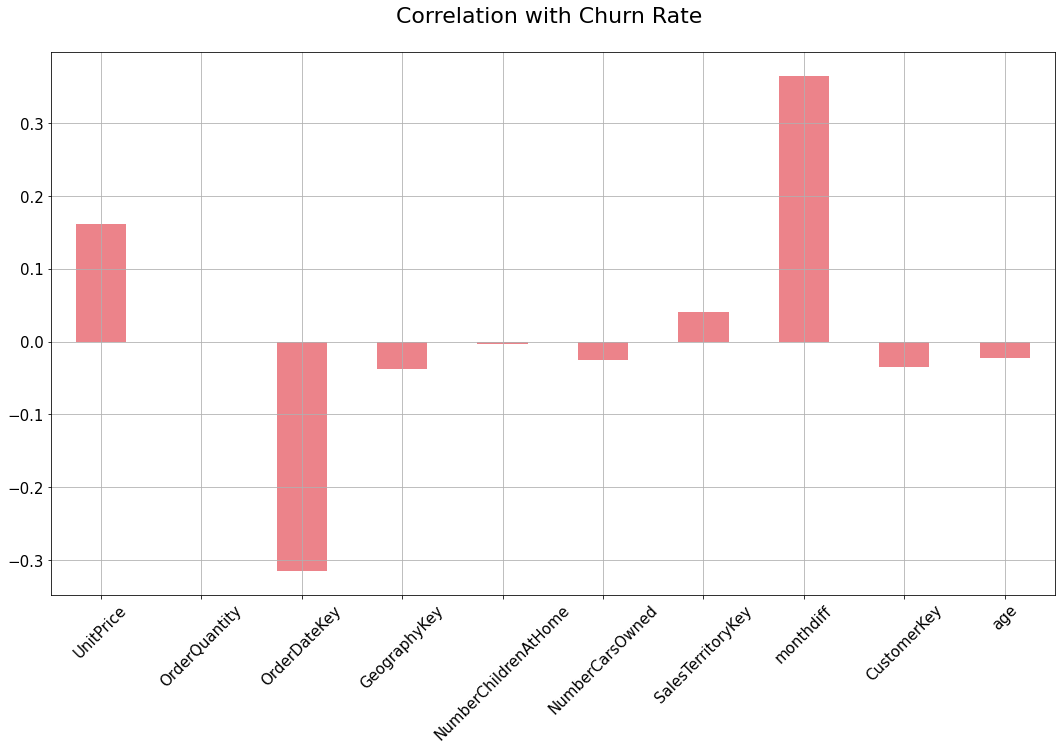

In [18]:
correlations = df_copy.corrwith(df_copy.churn)
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = '#ec838a',
        rot = 45, grid = True)
plt.title('Correlation with Churn Rate \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style('darkgrid')
sns.set(font_scale=1.3)

<ipython-input-20-d06f7b4fb49c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()# plot the heatmap


<AxesSubplot:>

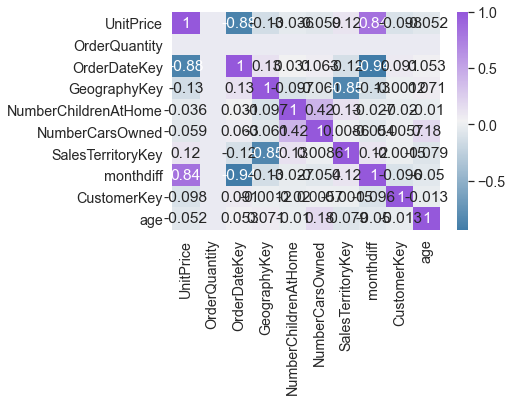

In [20]:
# calculate correlation matrix
corr = df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(600, 1000, as_cmap=True))

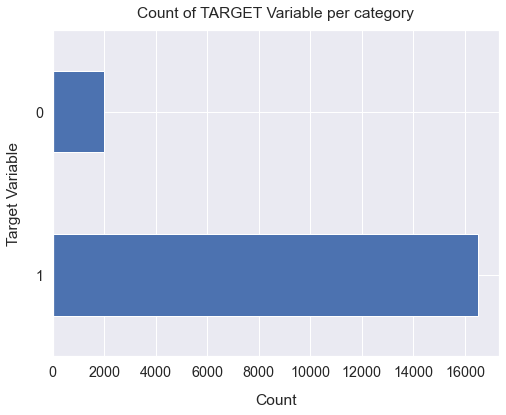

In [21]:
df['churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);


In [22]:
100*df['churn'].value_counts()/len(df['churn'])

1    89.255572
0    10.744428
Name: churn, dtype: float64

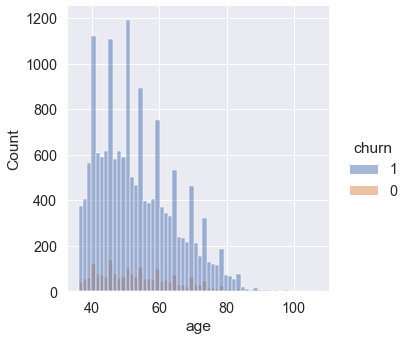

In [23]:
sns.displot(df,x="age",hue="churn")

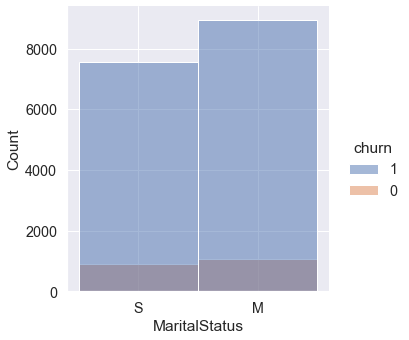

In [24]:
sns.displot(df,x="MaritalStatus",hue="churn")

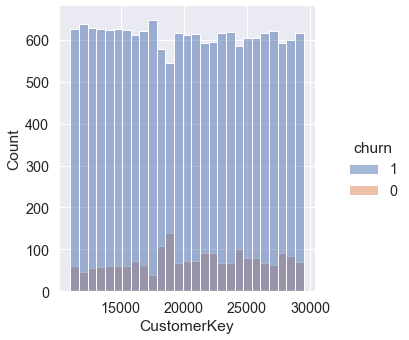

In [25]:
sns.displot(df,x="CustomerKey",hue="churn")

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   UnitPrice             18484 non-null  float64       
 1   OrderQuantity         18484 non-null  int64         
 2   OrderDateKey          18484 non-null  int64         
 3   BirthDate             18484 non-null  datetime64[ns]
 4   Gender                18484 non-null  object        
 5   CommuteDistance       18484 non-null  object        
 6   GeographyKey          18484 non-null  int64         
 7   HouseOwnerFlag        18484 non-null  object        
 8   NumberChildrenAtHome  18484 non-null  int64         
 9   NumberCarsOwned       18484 non-null  int64         
 10  SalesTerritoryKey     18484 non-null  int64         
 11  Gender                18484 non-null  object        
 12  MaritalStatus         18484 non-null  object        
 13  monthdiff       

<ipython-input-27-f9cfdda2a566>:14: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df_copy.corrwith(df_copy.churn)
<ipython-input-27-f9cfdda2a566>:25: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,UnitPrice,OrderQuantity,OrderDateKey,GeographyKey,NumberChildrenAtHome,NumberCarsOwned,SalesTerritoryKey,monthdiff,CustomerKey,age
UnitPrice,1.000000,NaN,-0.882296,-0.134583,-0.035505,-0.059384,0.118934,0.837914,-0.097755,-0.052311
OrderQuantity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OrderDateKey,-0.882296,NaN,1.000000,0.132967,0.031045,0.063268,-0.122172,-0.935389,0.090565,0.053082
GeographyKey,-0.134583,NaN,0.132967,1.000000,-0.096593,-0.061401,-0.847231,-0.132038,-0.001180,0.070855
NumberChildrenAtHome,-0.035505,NaN,0.031045,-0.096593,1.000000,0.424191,0.131727,-0.026854,-0.019974,-0.009951
NumberCarsOwned,-0.059384,NaN,0.063268,-0.061401,0.424191,1.000000,0.008556,-0.053892,0.005704,0.183786
SalesTerritoryKey,0.118934,NaN,-0.122172,-0.847231,0.131727,0.008556,1.000000,0.118607,-0.001535,-0.078662
monthdiff,0.837914,NaN,-0.935389,-0.132038,-0.026854,-0.053892,0.118607,1.000000,-0.096217,-0.050030
CustomerKey,-0.097755,NaN,0.090565,-0.001180,-0.019974,0.005704,-0.001535,-0.096217,1.000000,-0.013338
age,-0.052311,NaN,0.053082,0.070855,-0.009951,0.183786,-0.078662,-0.050030,-0.013338,1.000000


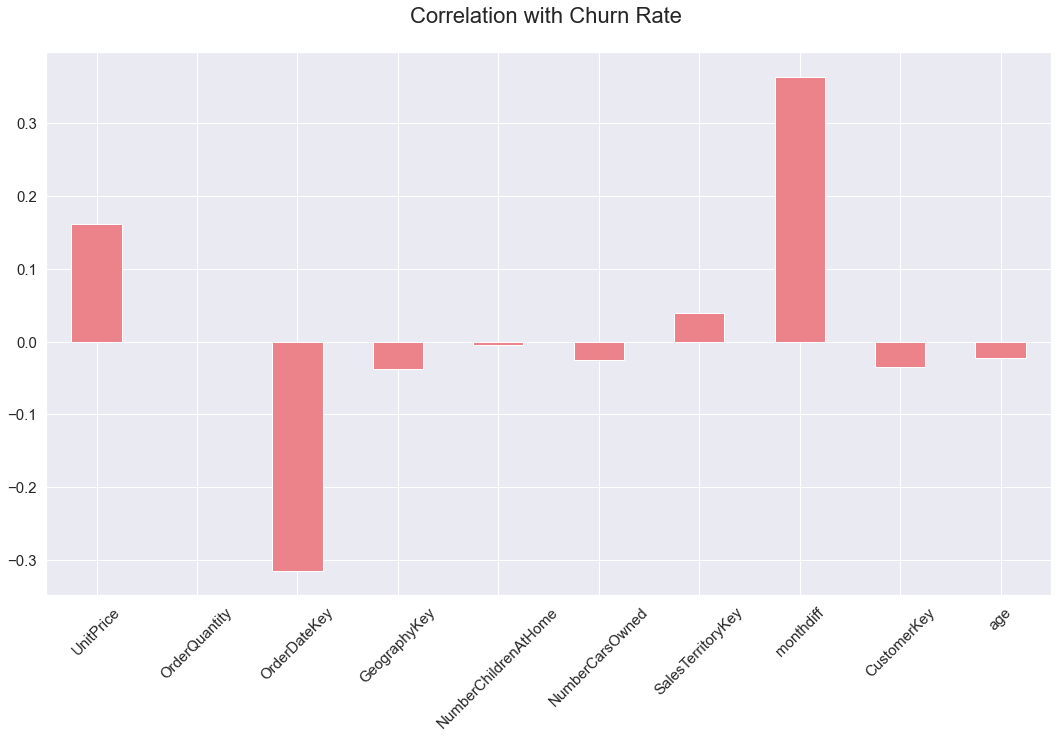

In [27]:

df_copy = df.copy()

df_copy.isnull().sum()

df_copy.isna().any()

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

df

df_copy['churn']=df_copy['churn'].astype(int)

correlations = df_copy.corrwith(df_copy.churn)
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = '#ec838a',
        rot = 45, grid = True)
plt.title('Correlation with Churn Rate \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

df.corr()

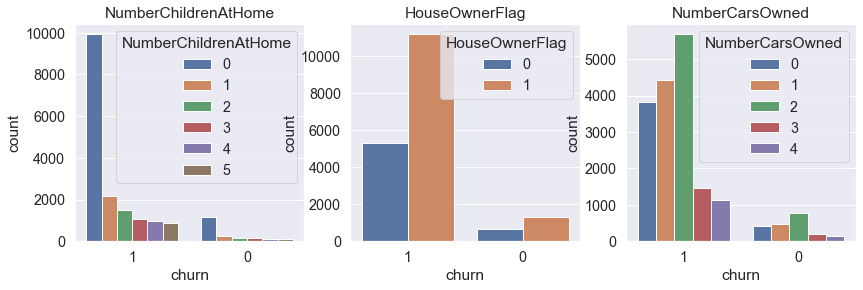

In [28]:
cols = ['NumberChildrenAtHome','HouseOwnerFlag', 'NumberCarsOwned']

plt.figure(figsize=(14,4))

for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i+1)
    sns.countplot(x ='churn', hue = str(col), data = df)
    ax.set_title(f"{col}")

LABEL ENCODING

In [29]:
df['MaritalStatus']=df['MaritalStatus'].astype(bool)

In [30]:
df['MaritalStatus']=df['MaritalStatus'].astype(int)

In [31]:
df['Gender']=df['Gender'].astype(bool)

In [32]:
df['Gender']=df['Gender'].astype(int)

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [34]:
objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['CommuteDistance', 'HouseOwnerFlag', 'churn'], dtype='object')


In [35]:
for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   UnitPrice             18484 non-null  float64       
 1   OrderQuantity         18484 non-null  int64         
 2   OrderDateKey          18484 non-null  int64         
 3   BirthDate             18484 non-null  datetime64[ns]
 4   Gender                18484 non-null  int32         
 5   CommuteDistance       18484 non-null  int32         
 6   GeographyKey          18484 non-null  int64         
 7   HouseOwnerFlag        18484 non-null  int32         
 8   NumberChildrenAtHome  18484 non-null  int64         
 9   NumberCarsOwned       18484 non-null  int64         
 10  SalesTerritoryKey     18484 non-null  int64         
 11  Gender                18484 non-null  int32         
 12  MaritalStatus         18484 non-null  int32         
 13  monthdiff       

RFM

In [36]:
import datetime as dt

In [37]:
df["totalamount"]=df['OrderQuantity']*df['UnitPrice']

In [38]:
df['totalamount'].astype(int)

0        3399
1        3399
2        3399
3         699
4        3578
         ... 
18479      35
18480       8
18481    2443
18482    1700
18483      54
Name: totalamount, Length: 18484, dtype: int32

In [39]:
total_amounts=pd.Series(df['totalamount'])

In [42]:
df["total_amount"]= total_amounts

def my_jr(series):
    amount = series['total_amount']
    df["amounts"]=amount

In [40]:
Latest_date=dt.datetime(2014,8,2)

In [41]:
RFMScores=df.groupby('CustomerKey').agg({'OrderDate':lambda x: (Latest_date - x.max()).days, 'OrderDateKey':lambda x: len(x),"totalamount":lambda x: x.sum()})

In [42]:
RFMScores['OrderDate']=RFMScores['OrderDate'].astype(int)

In [46]:
RFMScores.rename(columns={'OrderDate':'recency','OrderDateKey':'frequency','totalamount':'monetary'},inplace =True)

In [47]:
RFMScores.reset_index().head(10)

,CustomerKey,recency,frequency,monetary
0,11000,456,1,53.99
1,11001,235,1,34.99
2,11002,525,1,34.99
3,11003,449,1,2.29
4,11004,458,1,34.99
5,11005,457,1,2384.07
6,11006,445,1,2384.07
7,11007,501,1,34.99
8,11008,518,1,34.99
9,11009,450,1,34.99


In [48]:
RFMScores.recency.describe()

count    18484.000000
mean       375.332450
std        146.288729
min        186.000000
25%        272.000000
50%        354.000000
75%        449.000000
max       1312.000000
Name: recency, dtype: float64

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


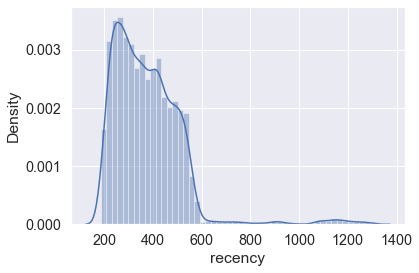

In [49]:
x=RFMScores['recency']
ax=sns.distplot(x)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


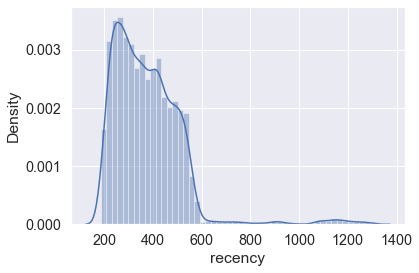

In [50]:
x=RFMScores['recency']
ax=sns.distplot(x)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


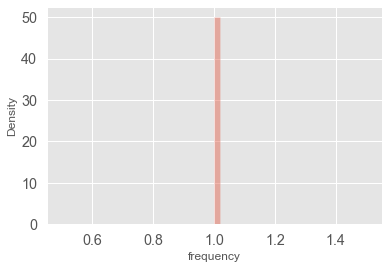

In [123]:
y=RFMScores['frequency']
ax=sns.distplot(y)

In [52]:
RFMScores.monetary.describe()

count    18484.000000
mean       192.796538
std        603.024394
min          2.290000
25%          8.990000
50%         34.990000
75%         49.990000
max       3578.270000
Name: monetary, dtype: float64

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


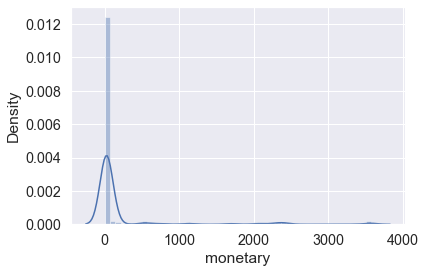

In [53]:
x=RFMScores['monetary']
ax=sns.distplot(x)

In [54]:
quantiles=RFMScores.quantile(q=[0.25,0.5,0.75])
quantiles=quantiles.to_dict()

In [55]:
quantiles

{'recency': {0.25: 272.0, 0.5: 354.0, 0.75: 449.0},
 'frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'monetary': {0.25: 8.99, 0.5: 34.99, 0.75: 49.99}}

In [56]:
def RScoring(x,p,d):
    if x<=d[p][0.25]:
        return 1
    elif x<=d[p][0.50]:
        return 2
    elif x<=d[p][0.75]:
        return 3
    else:
        return 4
        
def FnMScoring(x,p,d):
    if x<=d[p][0.25]:
        return 4
    elif x<=d[p][0.50]:
        return 3
    elif x<=d[p][0.75]:
        return 2
    else:
        return 1
    
        

In [57]:
RFMScores['R']=RFMScores['recency'].apply(RScoring,args=('recency',quantiles,))

In [58]:
RFMScores['F']=RFMScores['frequency'].apply(RScoring,args=('frequency',quantiles,))

In [59]:
RFMScores['M']=RFMScores['monetary'].apply(RScoring,args=('monetary',quantiles,))

In [60]:
RFMScores.head()

,recency,frequency,monetary,R,F,M
CustomerKey,,,,,,
11000,456,1,53.99,4,1,4
11001,235,1,34.99,1,1,2
11002,525,1,34.99,4,1,2
11003,449,1,2.29,3,1,1
11004,458,1,34.99,4,1,2


In [61]:
RFMScores['RFMGroup']=RFMScores.R.map(str)+ RFMScores.F.map(str) +RFMScores.M.map(str)

In [62]:
RFMScores['RFMScore']=RFMScores[['R','F','M']].sum(axis=1)

In [63]:
RFMScores.head()

,recency,frequency,monetary,R,F,M,RFMGroup,RFMScore
CustomerKey,,,,,,,,
11000,456,1,53.99,4,1,4,414,9
11001,235,1,34.99,1,1,2,112,4
11002,525,1,34.99,4,1,2,412,7
11003,449,1,2.29,3,1,1,311,5
11004,458,1,34.99,4,1,2,412,7


In [64]:
Level=['platinum','gold','silver','bronze']

In [65]:
Score_cuts=pd.qcut(RFMScores.RFMScore,q=4,labels=Level)

In [66]:
RFMScores['RFM_Level']=Score_cuts.values

In [67]:
RFMScores.reset_index().head()

,CustomerKey,recency,frequency,monetary,R,F,M,RFMGroup,RFMScore,RFM_Level
0,11000,456,1,53.99,4,1,4,414,9,bronze
1,11001,235,1,34.99,1,1,2,112,4,platinum
2,11002,525,1,34.99,4,1,2,412,7,silver
3,11003,449,1,2.29,3,1,1,311,5,gold
4,11004,458,1,34.99,4,1,2,412,7,silver


In [68]:
RFMScores[RFMScores['RFMGroup']=='111'].sort_values('monetary',ascending=False).reset_index().head(10)

,CustomerKey,recency,frequency,monetary,R,F,M,RFMGroup,RFMScore,RFM_Level
0,17218,253,1,8.99,1,1,1,111,3,platinum
1,17332,233,1,8.99,1,1,1,111,3,platinum
2,17413,262,1,8.99,1,1,1,111,3,platinum
3,17441,259,1,8.99,1,1,1,111,3,platinum
4,17522,265,1,8.99,1,1,1,111,3,platinum
5,17651,250,1,8.99,1,1,1,111,3,platinum
6,17654,259,1,8.99,1,1,1,111,3,platinum
7,17719,195,1,8.99,1,1,1,111,3,platinum
8,17778,237,1,8.99,1,1,1,111,3,platinum
9,17834,236,1,8.99,1,1,1,111,3,platinum


In [69]:
def handle_neg_n_zero(num):
    if num<=0:
        return 1
    else:
        return num
    
RFMScores['recency']=[handle_neg_n_zero(x) for x in RFMScores.recency]

In [70]:
RFMScores['monetary']=[handle_neg_n_zero(x) for x in RFMScores.monetary]

In [71]:
log_tfd_data=RFMScores[['recency','frequency','monetary']].apply(np.log,axis =1).round(3)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


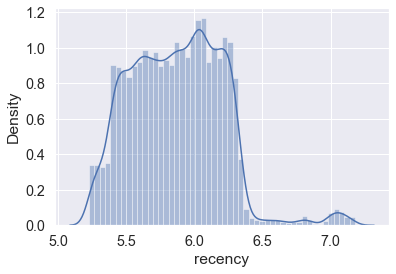

In [72]:
recency_plot=log_tfd_data['recency']
ax=sns.distplot(recency_plot)

In [73]:
from sklearn.preprocessing import StandardScaler



In [74]:
scaleobj =StandardScaler()


In [75]:
#data into same scale
Scaled_data = scaleobj.fit_transform(log_tfd_data)

In [76]:
#transform it back to dataframe
Scaled_data=pd.DataFrame(Scaled_data,index=RFMScores.index,columns=log_tfd_data.columns)

In [77]:
from sklearn.cluster import KMeans

sum_of_sq_dist={}

In [78]:
from sklearn.cluster import KMeans

sum_of_sq_dist={}
for k in range(1,15):
    km= KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km= km.fit(Scaled_data)
    sum_of_sq_dist[k]= km.inertia_

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\

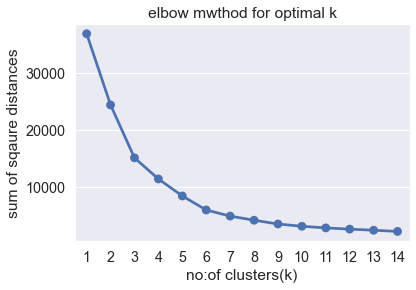

In [79]:
sns.pointplot(x= list(sum_of_sq_dist.keys()),y=list(sum_of_sq_dist.values()))
plt.xlabel('no:of clusters(k)')
plt.ylabel('sum of sqaure distances')
plt.title('elbow mwthod for optimal k')
plt.show()

In [80]:
KMean_clust =KMeans(n_clusters=3,init ='k-means++',max_iter= 1000)
KMean_clust.fit(Scaled_data)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=1000, n_clusters=3)

In [81]:
#find clusters for the observation given in the dataset 
RFMScores['cluster']= KMean_clust.labels_
RFMScores.head()


,recency,frequency,monetary,R,F,M,RFMGroup,RFMScore,RFM_Level,cluster
CustomerKey,,,,,,,,,,
11000,456,1,53.99,4,1,4,414,9,bronze,1
11001,235,1,34.99,1,1,2,112,4,platinum,0
11002,525,1,34.99,4,1,2,412,7,silver,1
11003,449,1,2.29,3,1,1,311,5,gold,1
11004,458,1,34.99,4,1,2,412,7,silver,1


In [82]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

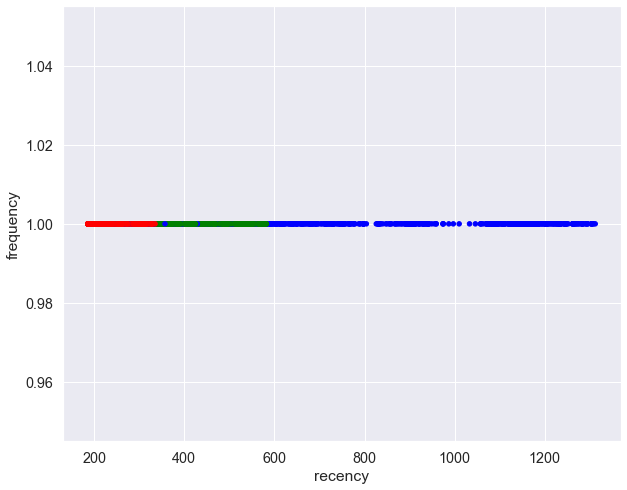

In [83]:
#scatter plot frequency vs recency
colors=["red","green","blue"]
RFMScores['color']= RFMScores['cluster'].map(lambda p:colors[p])
ax=RFMScores.plot(
    kind="scatter",
 x="recency",y="frequency",
 figsize=(10,8),
 c= RFMScores['color']
 )

In [84]:
RFMScores.head()

,recency,frequency,monetary,R,F,M,RFMGroup,RFMScore,RFM_Level,cluster,color
CustomerKey,,,,,,,,,,,
11000,456,1,53.99,4,1,4,414,9,bronze,1,green
11001,235,1,34.99,1,1,2,112,4,platinum,0,red
11002,525,1,34.99,4,1,2,412,7,silver,1,green
11003,449,1,2.29,3,1,1,311,5,gold,1,green
11004,458,1,34.99,4,1,2,412,7,silver,1,green


part 3 - predictive models

RANDOM FOREST

In [86]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss,CondensedNearestNeighbour
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay



In [87]:


import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc
  


In [88]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE


In [89]:
from sklearn.model_selection import train_test_split
finaldf=df.copy()
finaldf = finaldf.dropna()
finaldf = finaldf.drop(['CustomerKey'],axis=1)

X = finaldf.drop(['churn','OrderDateKey','OrderDate','BirthDate','DateFirstPurchase','CommuteDistance'],axis=1)
y = finaldf['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [90]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   UnitPrice             18484 non-null  float64
 1   OrderQuantity         18484 non-null  int64  
 2   Gender                18484 non-null  int32  
 3   GeographyKey          18484 non-null  int64  
 4   HouseOwnerFlag        18484 non-null  int32  
 5   NumberChildrenAtHome  18484 non-null  int64  
 6   NumberCarsOwned       18484 non-null  int64  
 7   SalesTerritoryKey     18484 non-null  int64  
 8   Gender                18484 non-null  int32  
 9   MaritalStatus         18484 non-null  int32  
 10  monthdiff             18484 non-null  int64  
 11  age                   18484 non-null  float64
 12  totalamount           18484 non-null  float64
 13  total_amount          18484 non-null  float64
dtypes: float64(4), int32(4), int64(6)
memory usage: 1.7 MB


In [91]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 18484 entries, 0 to 18483
Series name: churn
Non-Null Count  Dtype
--------------  -----
18484 non-null  int32
dtypes: int32(1)
memory usage: 72.3 KB


In [92]:
model = RandomForestClassifier( max_depth=2, n_estimators=30, min_samples_split=3, max_leaf_nodes=5, random_state=22)

In [93]:
model.fit(X_train, y_train)
print('Training Accuracy : ',metrics.accuracy_score( y_train, model.predict(X_train))*100)
 
print('Validation Accuracy : ', metrics.accuracy_score(y_test, model.predict(X_test))*100)

Training Accuracy :  99.6124031007752
Validation Accuracy :  99.40983606557377


In [94]:
model.score(X_test,y_test)

0.9940983606557378

In [95]:
clf_pred = model.predict(X_test)

In [136]:
#from sklearn.ensemble import RandomForestClassifier

#rf = RandomForestClassifier(random_state=42)
#rf.fit(X_train,y_train)


confusion matrix

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

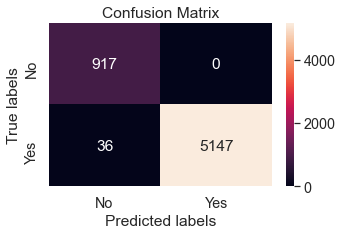

In [96]:
cm = confusion_matrix(clf_pred , y_test)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes']) ; ax.yaxis.set_ticklabels(['No', 'Yes'])

In [97]:
print(classification_report(y_test, clf_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       1.00      0.96      0.98       953
         Yes       0.99      1.00      1.00      5147

    accuracy                           0.99      6100
   macro avg       1.00      0.98      0.99      6100
weighted avg       0.99      0.99      0.99      6100



In [98]:
print(f"Precision Score: {precision_score(y_test,clf_pred)}")
print(f"Recall Score: {recall_score(y_test,clf_pred)}")
print(f"Accuracy Score: {accuracy_score(y_test,clf_pred)}")
print(f"F1 Score: {f1_score(y_test,clf_pred)}")

Precision Score: 0.99305421570519
Recall Score: 1.0
Accuracy Score: 0.9940983606557378
F1 Score: 0.996515004840271


AUC Score: 0.981112277019937


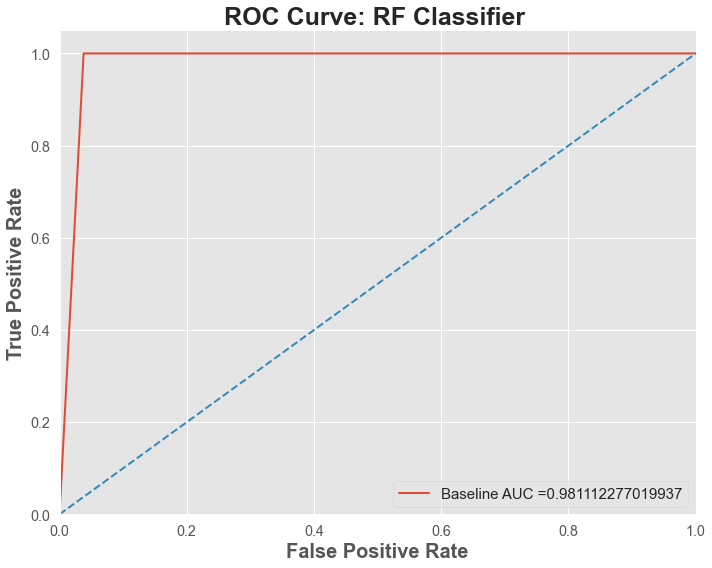

In [99]:
# Assign false positive rate, true pos rate, and thresholds to variables using sklearn.metrics library
fpr, tpr, threshold = roc_curve(y_test,clf_pred)
# Calculate AUC score from sklearn.metrics library
roc_auc = auc(fpr, tpr)
# Print auc score
print(f'AUC Score: {roc_auc}')

# Plot AUC curve
plt.style.use('ggplot')
plt.figure(figsize = (10,8))
plt.plot(fpr, tpr, lw = 2, label = 'Baseline AUC ='+str(roc_auc))
plt.plot([0,1],[0,1], linestyle = '--', lw = 2)
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate', fontsize = 20, fontweight = 'bold')
plt.ylabel('True Positive Rate', fontsize = 20, fontweight = 'bold')
plt.title('ROC Curve: RF Classifier ', fontsize = 25, fontweight = 'bold')
plt.legend(loc = 4, fontsize = 15)
plt.tight_layout()

SVM

In [100]:

from sklearn.svm import SVC

In [101]:
ksvm = SVC(kernel='rbf',gamma=0.1,C=10.0)

In [102]:
from sklearn.model_selection import train_test_split
finaldf=df.copy()
finaldf = finaldf.dropna()
finaldf = finaldf.drop(['CustomerKey'],axis=1)

X = finaldf.drop(['churn','OrderDateKey','OrderDate','BirthDate','DateFirstPurchase','CommuteDistance'],axis=1)
y = finaldf['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [103]:
ksvm.fit(X_train, y_train)

SVC(C=10.0, gamma=0.1)

In [104]:
accuracy = ksvm.score(X_test, y_test)

In [105]:
print('Accuracy:', accuracy)

Accuracy: 0.8660295708618825


In [106]:
ksvm_p=ksvm.predict(X_test)

In [107]:
print(f"Precision Score: {precision_score(y_test, ksvm_p)}")
print(f"Recall Score: {recall_score(y_test, ksvm_p)}")
print(f"Accuracy Score: {accuracy_score(y_test, ksvm_p)}")
print(f"F1 Score: {f1_score(y_test, ksvm_p)}")

Precision Score: 0.8749047981721249
Recall Score: 0.9816278572954497
Accuracy Score: 0.8660295708618825
F1 Score: 0.9251988321755764


[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

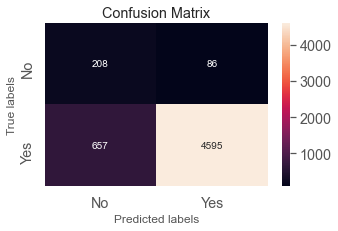

In [108]:
cm = confusion_matrix(ksvm_p,y_test)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes']) ; ax.yaxis.set_ticklabels(['No', 'Yes'])

AUC Score: 0.6110451425205572


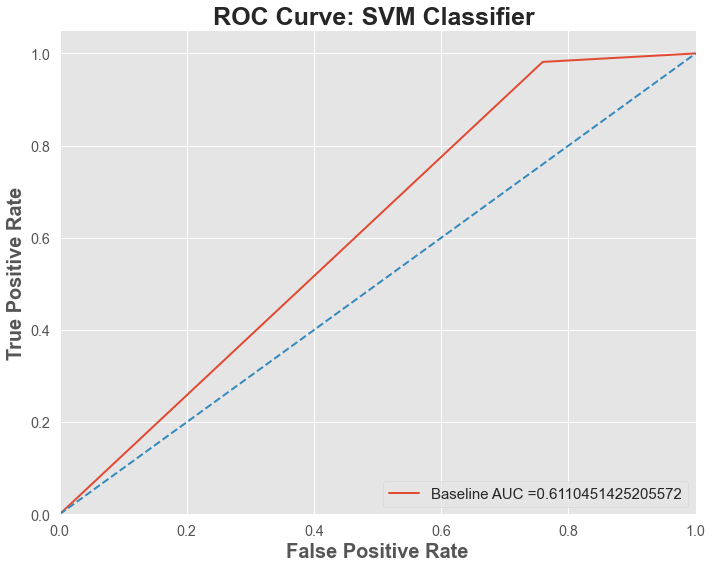

In [109]:
fpr, tpr, threshold = roc_curve(y_test,ksvm_p)
# Calculate AUC score from sklearn.metrics library
roc_auc = auc(fpr, tpr)
# Print auc score
print(f'AUC Score: {roc_auc}')

# Plot AUC curve
plt.style.use('ggplot')
plt.figure(figsize = (10,8))
plt.plot(fpr, tpr, lw = 2, label = 'Baseline AUC ='+str(roc_auc))
plt.plot([0,1],[0,1], linestyle = '--', lw = 2)
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate', fontsize = 20, fontweight = 'bold')
plt.ylabel('True Positive Rate', fontsize = 20, fontweight = 'bold')
plt.title('ROC Curve: SVM Classifier ', fontsize = 25, fontweight = 'bold')
plt.legend(loc = 4, fontsize = 15)
plt.tight_layout()

KNNN

In [110]:
# Instantiate KNN object
knn1 = KNeighborsClassifier()

# Fit training set to our classifying object
knn1.fit(X_train, y_train)

KNeighborsClassifier()

In [111]:
# Assign predictions to variable
test_preds1 = knn1.predict(X_test)

# Calculate (accuracy) score metric
knn1.score(X_test, y_test)

0.8598990263252795

In [112]:
# Calculate and print all four major metrics
print(f"Precision Score: {precision_score(y_test, test_preds1)}")
print(f"Recall Score: {recall_score(y_test, test_preds1)}")
print(f"Accuracy Score: {accuracy_score(y_test, test_preds1)}")
print(f"F1 Score: {f1_score(y_test, test_preds1)}")

Precision Score: 0.8749519784863619
Recall Score: 0.9730826746421705
Accuracy Score: 0.8598990263252795
F1 Score: 0.9214119550925458


AUC Score: 0.6102407592864031


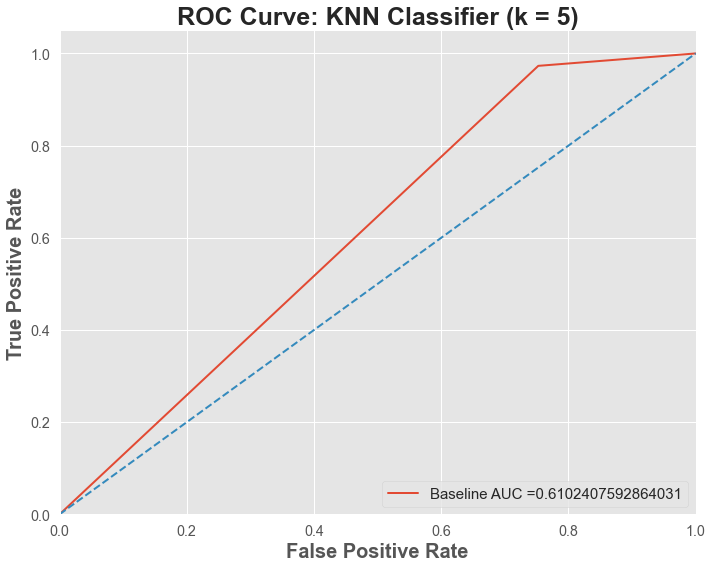

In [113]:
# Assign false positive rate, true pos rate, and thresholds to variables using sklearn.metrics library
fpr, tpr, threshold = roc_curve(y_test, test_preds1)
# Calculate AUC score from sklearn.metrics library
roc_auc = auc(fpr, tpr)
# Print auc score
print(f'AUC Score: {roc_auc}')

# Plot AUC curve
plt.style.use('ggplot')
plt.figure(figsize = (10,8))
plt.plot(fpr, tpr, lw = 2, label = 'Baseline AUC ='+str(roc_auc))
plt.plot([0,1],[0,1], linestyle = '--', lw = 2)
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate', fontsize = 20, fontweight = 'bold')
plt.ylabel('True Positive Rate', fontsize = 20, fontweight = 'bold')
plt.title('ROC Curve: KNN Classifier (k = 5)', fontsize = 25, fontweight = 'bold')
plt.legend(loc = 4, fontsize = 15)
plt.tight_layout()

In [114]:
# Instantiate KNN classifier object again, assigning a different name
knn_clf = KNeighborsClassifier()

# perform a cross validation score using sklearn.model_selection (iterate until maximum output score)
knn_cv_score = cross_val_score(knn_clf, X_train, y_train, cv = 4)

# Use numpy to obtain mean accuracy score from cross-validation folds and display
mean_knn_cv_score = np.mean(knn_cv_score)
print(f"Mean Cross Validation Score: {mean_knn_cv_score :.2%}")

Mean Cross Validation Score: 85.17%


In [115]:
# Instantiate a second KNN classifier object
knn2 = KNeighborsClassifier()
# Establish parameters grid in dictionary form per KNN documentation
param_grid = {'n_neighbors':np.arange(1,20)}
# Pass instantiated KNN object, parameter grid, and optimal fold value as arguments
knn2_gscv = GridSearchCV(knn2, param_grid, cv = 4)
# Fit train data to our new object
knn2_gscv.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [116]:
# Predict test values
test_preds2 = knn2_gscv.predict(X_test)

In [117]:
knn2_gscv.score(X_test,y_test)

0.8613415073927154

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

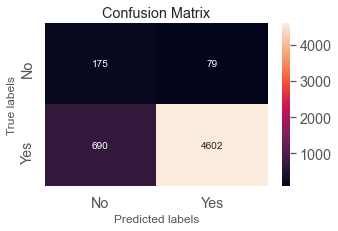

In [118]:
cm = confusion_matrix(test_preds2,y_test)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes']) ; ax.yaxis.set_ticklabels(['No', 'Yes'])

In [119]:
print(f"Precision Score: {precision_score(y_test, test_preds2)}")
print(f"Recall Score: {recall_score(y_test, test_preds2)}")
print(f"Accuracy Score: {accuracy_score(y_test, test_preds2)}")
print(f"F1 Score: {f1_score(y_test, test_preds2)}")

Precision Score: 0.8696145124716553
Recall Score: 0.9831232642597736
Accuracy Score: 0.8613415073927154
F1 Score: 0.9228918078812796


AUC Score: 0.5927177014940487


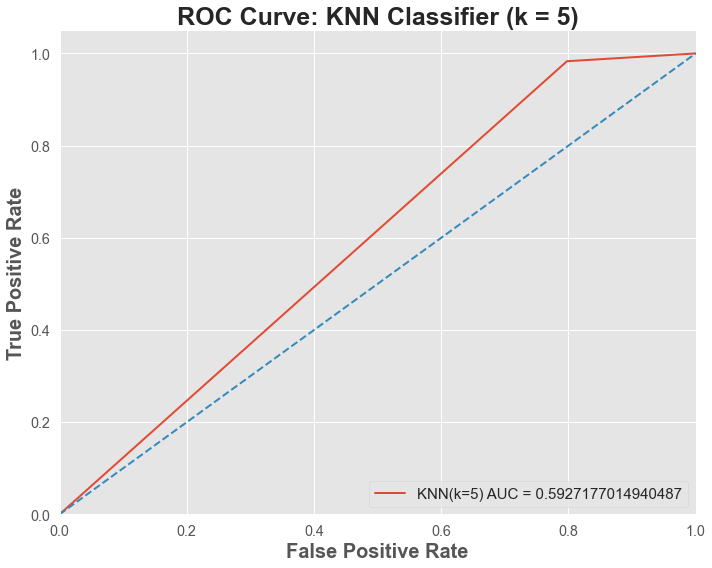

In [120]:
# Obtain major metrics and plot second ROC curve
fpr, tpr, threshold = roc_curve(y_test, test_preds2)
roc_auc = auc(fpr, tpr)
print(f'AUC Score: {roc_auc}')

plt.style.use('ggplot')
plt.figure(figsize = (10,8))
plt.plot(fpr, tpr,lw = 2, label = 'KNN(k=5) AUC = '+str(roc_auc))
plt.plot([0,1],[0,1], linestyle = '--', lw = 2)
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate', fontsize = 20, fontweight = 'bold')
plt.ylabel('True Positive Rate', fontsize = 20, fontweight = 'bold')
plt.title('ROC Curve: KNN Classifier (k = 5)', fontsize = 25, fontweight = 'bold')
plt.legend(loc = 4, fontsize = 15)
plt.tight_layout()